# ISIC 2020 Skin Cancer Detection Challenge

In [16]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/ISIC_2020_Training_GroundTruth_v2.csv')

# Create automated profiling of the data
profile = ProfileReport(df, title='ISIC 2020 Dataset', explorative=True)
profile.to_file('data/isic_2020_profiling.html')

In [6]:
df.head()

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,IL_7972535,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,IL_4649854,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,IL_9087444,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,IL_4255399,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,IL_6898037,female,55.0,upper extremity,unknown,benign,0


benign       32542
malignant      584
Name: benign_malignant, dtype: int64

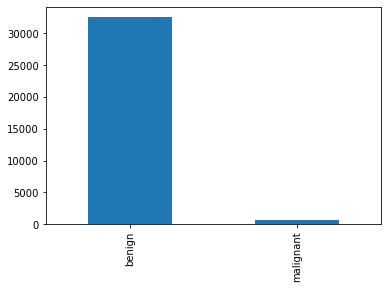

In [27]:
df.benign_malignant.value_counts().plot(kind='bar')
df.benign_malignant.value_counts()

## Patients analysis

### Total patients

In [8]:
print('Total patients:', df.patient_id.nunique())

Total patients: 2056


male      17080
female    15981
Name: sex, dtype: int64

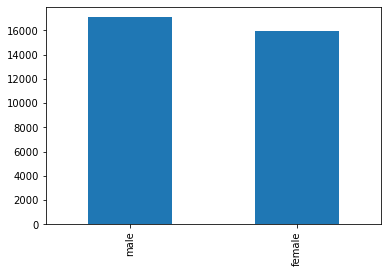

In [29]:
df.sex.value_counts().plot(kind='bar')
df.sex.value_counts()

<AxesSubplot:>

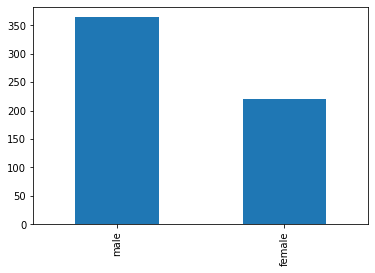

In [32]:
# Sex distriburion of malignant images
df[df['benign_malignant'] == 'malignant'].sex.value_counts()
df[df['benign_malignant'] == 'malignant'].sex.value_counts().plot(kind='bar')

### Age

<AxesSubplot:ylabel='Frequency'>

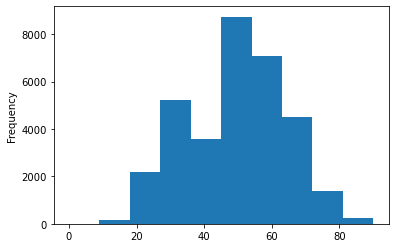

In [35]:
df.age_approx.plot(kind='hist')

### Diagnosis

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

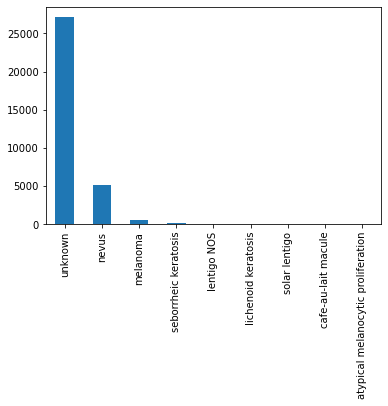

In [40]:
df.diagnosis.value_counts().plot(kind='bar')
df.diagnosis.value_counts()

## Images

In [48]:
import os
import cv2

def image_size(image_path):
    img = cv2.imread(f'data/train/{image_path}')
    return img.shape

images_list = os.listdir('data/train')

images_df = pd.DataFrame()
images_df['filename'] = images_list
images_df['shape'] = images_df['filename'].apply(image_size)
images_df.head()